In [28]:
#the modification of the code from Session 24 CS50

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats

# defining a function to print out some simple statistics of the data
#it is useful for #varibales and the further caluclations of tests for statistical and practical significance
def print_stats(list):
    print('count:',len(list))
    print('mean:',np.mean(list))
    print("median:", np.median(list))
    print("range:", max(list)-min(list))
    print('std:',np.std(list,ddof=1),"\n") #Bessel's correction

salariesdata = pd.read_csv('salaries-by-region.csv')

#extracting the right column (7th column) for mid-career 90th percentile salary based on the region
northeastern = list(salariesdata[salariesdata.Region == 'Northeastern'].values[:,7])
southern = list(salariesdata[salariesdata.Region == 'Southern'].values[:,7])

Southern = []
Northeastern = []

#the salary entries have $ signs, commas and dots that makes it harder to process the data
#thus, it was decided to erase them
for i in southern:
    new = i.replace("$", "")
    n = new.replace(".00", "")
    m = n.replace(",","")
    Southern.append(int(m))
    
for i in northeastern:
    new = i.replace("$", "")
    n = new.replace(".00", "")
    m = n.replace(",","")
    Northeastern.append(int(m))

# print the stats for each category
print('Northeastern')
print_stats(Northeastern)

print('Southern')
print_stats(Southern)


Northeastern
count: 82
mean: 181926.82926829267
median: 173500.0
range: 209000
std: 42439.14466266828 

Southern
count: 71
mean: 152769.01408450704
median: 150000.0
range: 156700
std: 32587.980218607754 



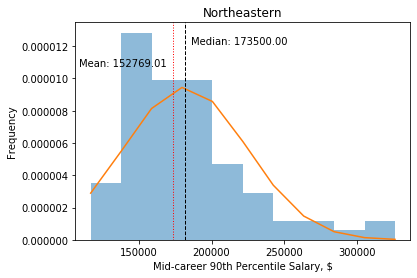

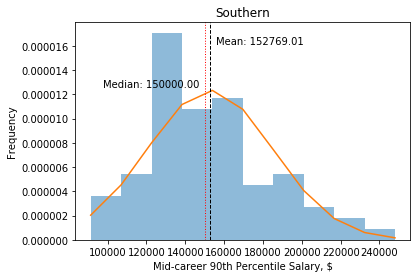

In [29]:
#drawing historgrams for #descriptivestats and assessing conditions for the test

#plt.hist(Northeastern)
_, bins, _ = plt.hist(Northeastern, 10, density=1, alpha=0.5)
mu, sigma = stats.norm.fit(Northeastern)
best_fit_line = stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line) #drawing normal curve
plt.title('Northeastern')
plt.xlabel('Mid-career 90th Percentile Salary, $')
plt.ylabel('Frequency')
min_ylim, max_ylim = plt.ylim()     
plt.axvline(np.mean(Northeastern), color='k', linestyle='dashed', linewidth=1)   
plt.text(np.mean(Northeastern)*0.6, max_ylim*0.8, 'Mean: {:.2f}'.format(np.mean(Southern)))    
plt.axvline(np.median(Northeastern), color='r', linestyle='dotted', linewidth=1 )  
plt.text(np.median(Northeastern)*1.07, max_ylim*0.9, 'Median: {:.2f}'.format(np.median(Northeastern)))  
plt.show()

#plt.hist(Southern)
_, bins, _ = plt.hist(Southern, 10, density=1, alpha=0.5)
mu, sigma = stats.norm.fit(Southern)
best_fit_line = stats.norm.pdf(bins, mu, sigma) 
plt.plot(bins, best_fit_line) #drawing normal curve
plt.title('Southern')
plt.xlabel('Mid-career 90th Percentile Salary, $')
plt.ylabel('Frequency')
min_ylim, max_ylim = plt.ylim()      #deriving the upper and lower bounds of the y axis, which is necessery for putting a text next to the vertical lines
plt.axvline(np.mean(Southern), color='k', linestyle='dashed', linewidth=1)    #drawing a vertical line representing previously derived mean
plt.text(np.mean(Southern)*1.02, max_ylim*0.9, 'Mean: {:.2f}'.format(np.mean(Southern)))    #putting a text with the corresponding value of the mean
plt.axvline(np.median(Southern), color='r', linestyle='dotted', linewidth=1 )  #another vertical line showing the median
plt.text(np.median(Southern)*0.65, max_ylim*0.7, 'Median: {:.2f}'.format(np.median(Southern)))   #labeling the median
plt.show()


In [30]:
from scipy import stats

#fisrt, we calcualate the confidence interval
mean = np.mean(Northeastern) - np.mean(Southern) #difference of mean
SE = (np.std(Southern,ddof=1)**2/len(Southern)+np.std(Northeastern,ddof=1)**2/len(Northeastern))**0.5   #standard error of difference of mean with the Bessel's correction applied
degrees_of_freedom = min(len(Northeastern)-1, len(Southern)-1) #the degree of freedom is the minimum of two sample sizes minus one: conservative estimate from OpenIntro
t = stats.t.ppf(0.975,degrees_of_freedom) #calculating the t-score from p; 0.975 bcause we added 2.5% on the left tail
print("Confidence interval: [", mean - t * SE, ",", mean + t* SE, "]") #calculation of the lower and upper bound of the interval


Confidence interval: [ 17038.95203995214 , 41276.67832761911 ]


In [31]:
#the calcualtion of the p-value
T = (np.mean(Southern)-np.mean(Northeastern))/SE #finding the t-score
print("p-value:", stats.t.cdf(T,degrees_of_freedom))


p-value: 4.369697827622665e-06


In [32]:
#assessing the practical significance
SDpooled = np.sqrt((np.std(Northeastern,ddof=1)**2*(len(Northeastern)-1) + np.std(Southern,ddof=1)**2*(len(Southern)-1))/(len(Northeastern)+len(Southern)-2)) # OpenIntro section 5.3.6
Cohensd = mean/SDpooled
Hedgesg = Cohensd * (1-3/(4*(len(Northeastern)+len(Southern))-9))
print("Cohen's d:", Cohensd)
print("Hedge's g:", Hedgesg)


Cohen's d: 0.7635003546675959
Hedge's g: 0.759701845440394


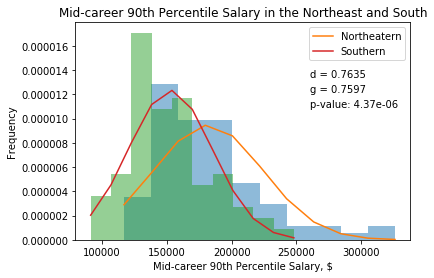

In [26]:
_, bins, _ = plt.hist(Northeastern, 10, density=1, alpha=0.5)
mu, sigma = stats.norm.fit(Northeastern)
best_fit_line = stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line, label="Northeatern") #drawing normal curve
plt.title('Mid-career 90th Percentile Salary in the Northeast and South')
plt.xlabel('Mid-career 90th Percentile Salary, $')
plt.ylabel('Frequency')

_, bins, _ = plt.hist(Southern, 10, density=1, alpha=0.5)
mu, sigma = stats.norm.fit(Southern)
best_fit_line = stats.norm.pdf(bins, mu, sigma) 
plt.plot(bins, best_fit_line, label="Southern") #drawing normal curve

min_ylim, max_ylim = plt.ylim()      #deriving the upper and lower bounds of the y axis, which is necessery for putting a text next to the vertical lines
min_xlim, max_xlim = plt.xlim()

plt.text(max_xlim*0.77, max_ylim*0.75, 'd = 0.7635')    #putting a text with the resulting statistics 
plt.text(max_xlim*0.77, max_ylim*0.68, 'g = 0.7597') 
plt.text(max_xlim*0.77, max_ylim*0.61, 'p-value: 4.37e-06 ') 

plt.legend()
plt.show()
